In [1]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets,transforms
from torch.autograd import Variable

In [2]:
transformers=transforms.Compose([
                               transforms.Resize((32, 32)),
                        transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])

In [3]:
def dataloader(train_bsize, test_bsize):
    train_ds=torchvision.datasets.MNIST(root='data',train=True,download=True,
                            transform=transformers)
    new_targets = torch.tensor(np.random.randint(0, 10, (len(train_ds)),))
    train_ds.targets= new_targets                                   
                                         
    train_dataloader=torch.utils.data.DataLoader(train_ds,batch_size=train_bsize, shuffle=True)
    test_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=False,download=True,
                            transform= transformers),batch_size=test_bsize, shuffle=True)
    return (train_dataloader,test_dataloader)

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.linear1=nn.Linear(16*5*5,100)
        self.linear2=nn.Linear(100,60)
        self.linear3=nn.Linear(60,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x=self.linear1(x)
        x=F.leaky_relu(x)
        x=self.linear2(x)
        x=F.leaky_relu(x)
        x=self.linear3(x)
        return x
    

In [5]:
train_loader,test_loader=dataloader(100,100)

In [6]:
def train_model(model, train_loader):
    correct_samples = 0
    train_loss = 0
    for b_index, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        pred = model(data)
        loss = Floss(pred, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        pred = np.argmax(pred.data, axis=1)
        correct_samples += np.equal(pred, target.data).sum()
    
    train_loss = (train_loss ) / len(train_loader.dataset)
    acc = 100.0 * correct_samples / len(train_loader.dataset)
    return train_loss.data.numpy().tolist(), acc

In [7]:
def test_model(model, epoch, test_loader):
    model.eval()
    correct_samples = 0
    test_loss = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        pred = model(data)
        loss = Floss(pred, target)
        test_loss += loss.data

        pred = np.argmax(pred.data, axis = 1)
        correct_samples  += np.equal(pred, target.data).sum()

    # Print log
    test_loss = (test_loss ) / len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(epoch,
        test_loss, correct_samples, len(test_loader.dataset),
        100. * correct_samples / len(test_loader.dataset)))
    return test_loss.data.numpy().tolist()

In [8]:
model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_loss_list = []
test_loss_list = []

epochs = 100
log_interval = 500
Floss = torch.nn.CrossEntropyLoss()
for epoch in range(1, epochs + 1):
    train_loss, train_acc = train_model(model, train_loader)
    train_loss_list.append(train_loss)
    test_loss = test_model(model, epoch, test_loader)
    test_loss_list.append(test_loss)
    print('Epoch: ', epoch)
    print('Train Loss= ', train_loss)
    print('Test Loss=',test_loss)


Test set, Epoch 1 , Average loss: 0.0231, Accuracy: 1058/10000 (11%)

Epoch:  1
Train Loss=  0.023032324388623238
Test Loss= 0.02305467613041401

Test set, Epoch 2 , Average loss: 0.0230, Accuracy: 1189/10000 (12%)

Epoch:  2
Train Loss=  0.023023907095193863
Test Loss= 0.023048369213938713

Test set, Epoch 3 , Average loss: 0.0231, Accuracy: 948/10000 (9%)

Epoch:  3
Train Loss=  0.023020192980766296
Test Loss= 0.02305128239095211

Test set, Epoch 4 , Average loss: 0.0231, Accuracy: 548/10000 (5%)

Epoch:  4
Train Loss=  0.023015804588794708
Test Loss= 0.02308749035000801

Test set, Epoch 5 , Average loss: 0.0231, Accuracy: 440/10000 (4%)

Epoch:  5
Train Loss=  0.02301020361483097
Test Loss= 0.023098289966583252

Test set, Epoch 6 , Average loss: 0.0231, Accuracy: 843/10000 (8%)

Epoch:  6
Train Loss=  0.023002756759524345
Test Loss= 0.02314954623579979

Test set, Epoch 7 , Average loss: 0.0231, Accuracy: 724/10000 (7%)

Epoch:  7
Train Loss=  0.022994428873062134
Test Loss= 0.02312


Test set, Epoch 58 , Average loss: 0.0245, Accuracy: 925/10000 (9%)

Epoch:  58
Train Loss=  0.021708453074097633
Test Loss= 0.024496503174304962

Test set, Epoch 59 , Average loss: 0.0245, Accuracy: 883/10000 (9%)

Epoch:  59
Train Loss=  0.02168823406100273
Test Loss= 0.024475136771798134

Test set, Epoch 60 , Average loss: 0.0244, Accuracy: 958/10000 (10%)

Epoch:  60
Train Loss=  0.02165813557803631
Test Loss= 0.02437375672161579

Test set, Epoch 61 , Average loss: 0.0248, Accuracy: 818/10000 (8%)

Epoch:  61
Train Loss=  0.02162916213274002
Test Loss= 0.02476128377020359

Test set, Epoch 62 , Average loss: 0.0251, Accuracy: 787/10000 (8%)

Epoch:  62
Train Loss=  0.02160082384943962
Test Loss= 0.02505779080092907

Test set, Epoch 63 , Average loss: 0.0247, Accuracy: 950/10000 (10%)

Epoch:  63
Train Loss=  0.02157333865761757
Test Loss= 0.024738028645515442

Test set, Epoch 64 , Average loss: 0.0247, Accuracy: 845/10000 (8%)

Epoch:  64
Train Loss=  0.021542824804782867
Test Loss

In [9]:
print(train_loss_list)
print(test_loss_list)

[0.023032324388623238, 0.023023907095193863, 0.023020192980766296, 0.023015804588794708, 0.02301020361483097, 0.023002756759524345, 0.022994428873062134, 0.022983403876423836, 0.022971900179982185, 0.022958768531680107, 0.022943178191781044, 0.02293047122657299, 0.022910961881279945, 0.022892557084560394, 0.02287141978740692, 0.02285066805779934, 0.022831063717603683, 0.022806823253631592, 0.02278434857726097, 0.022762658074498177, 0.022738685831427574, 0.02271624282002449, 0.02268858067691326, 0.0226608719676733, 0.022635003551840782, 0.022609716281294823, 0.022579113021492958, 0.022556541487574577, 0.022528305649757385, 0.022497614845633507, 0.02247254177927971, 0.02244676649570465, 0.02241569757461548, 0.02238795906305313, 0.022364525124430656, 0.022329792380332947, 0.02230645902454853, 0.022284483537077904, 0.022250797599554062, 0.0222187303006649, 0.022189490497112274, 0.022160299122333527, 0.02213500626385212, 0.02210773527622223, 0.022076064720749855, 0.022050214931368828, 0.022

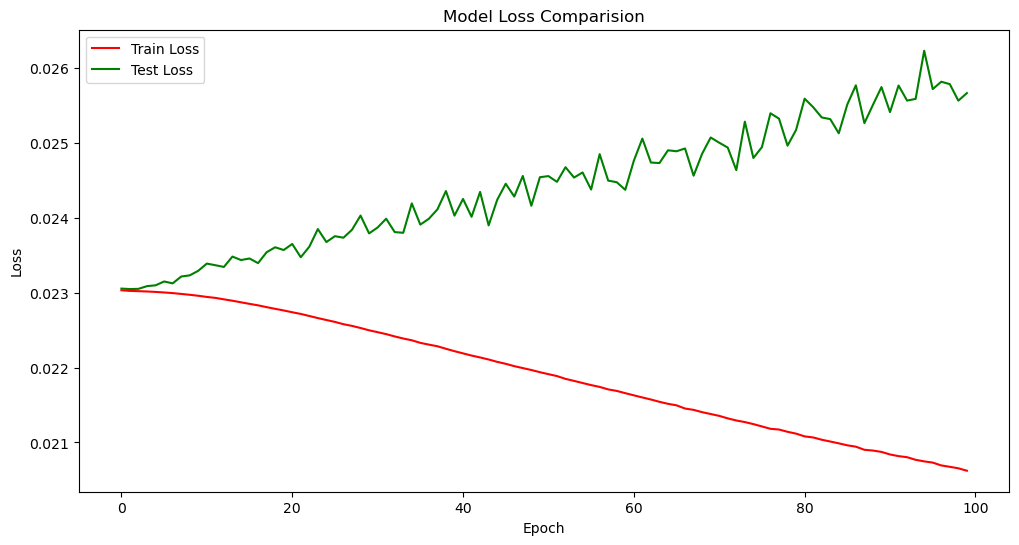

In [10]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 100, 1), train_loss_list, color = "r")
plt.plot(np.arange(0, 100, 1), test_loss_list, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Epoch')